In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

D:\anconda\envs\ml_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='test_result', ylabel='count'>

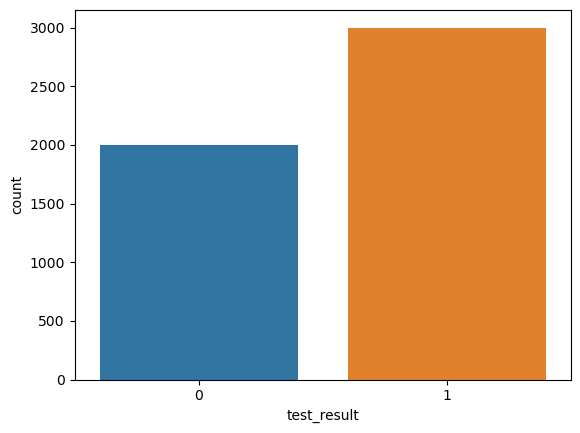

In [6]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

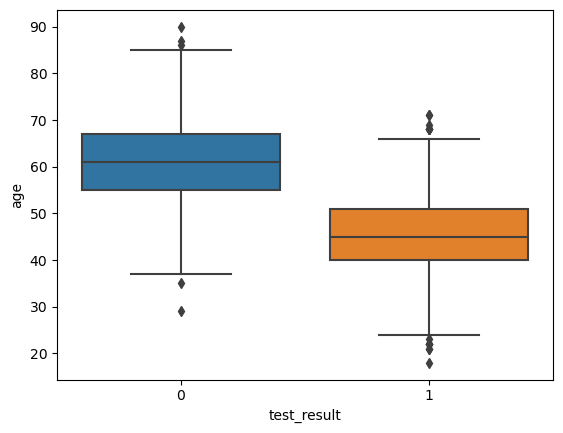

In [12]:
plt.figure(dpi=100)
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

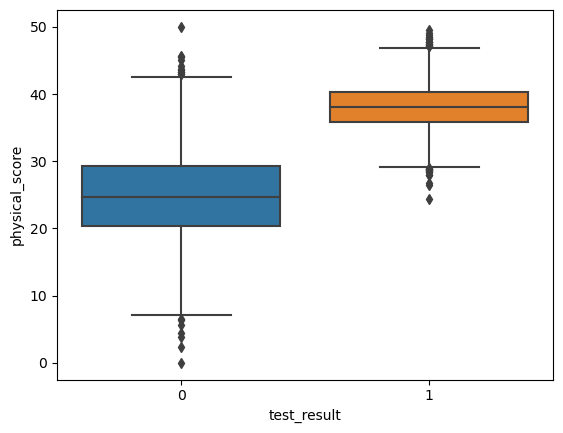

In [14]:
plt.figure(dpi=100)
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

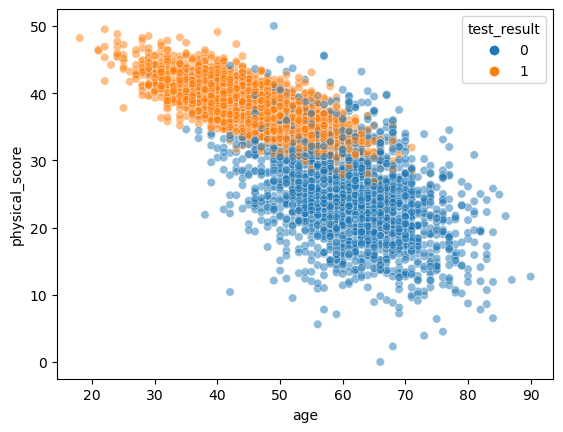

In [16]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

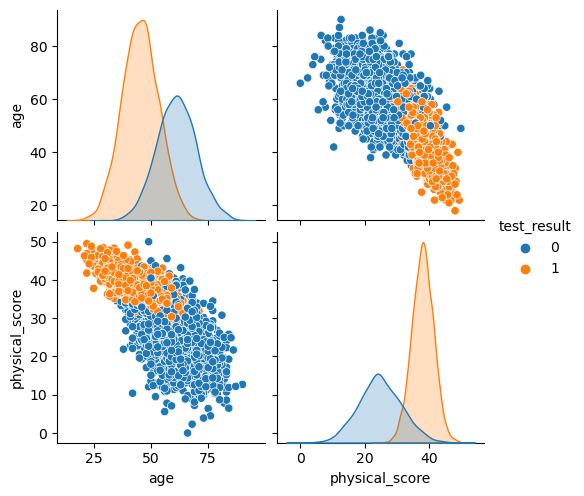

In [17]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

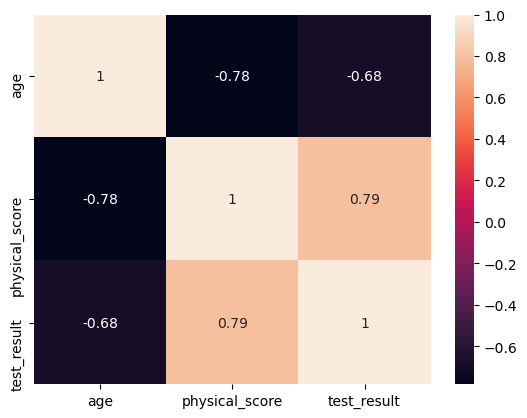

In [18]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

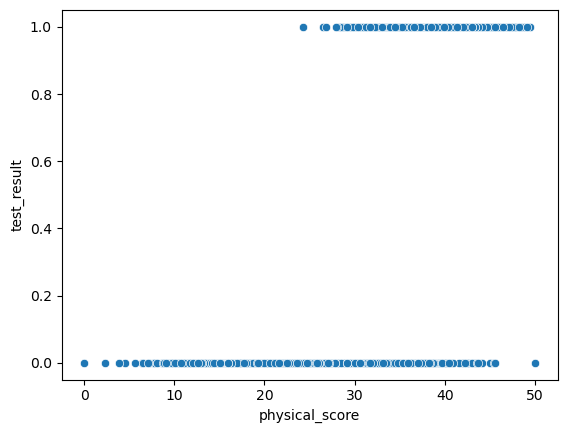

In [19]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

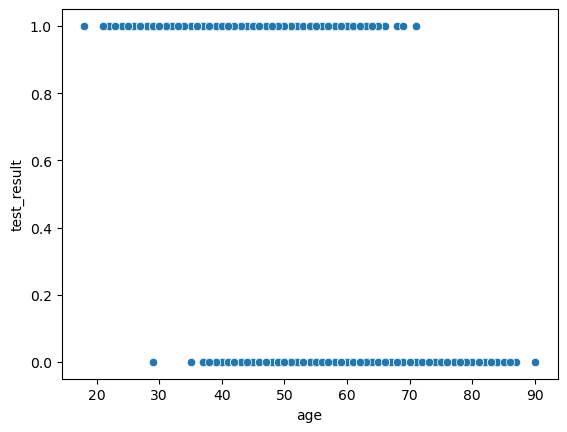

In [20]:
sns.scatterplot(x='age',y='test_result',data=df)

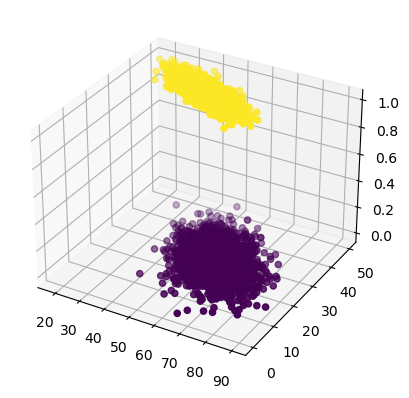

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
# с это тот же параметр hue

####  Разбиение на обучающую и тестовую выборки, а также масштабирование данных

In [23]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Модель логистической регрессии

In [28]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [38]:
log_model = LogisticRegression()

In [39]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [45]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [46]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [48]:
y_pred = log_model.predict(scaled_X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.93

In [50]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

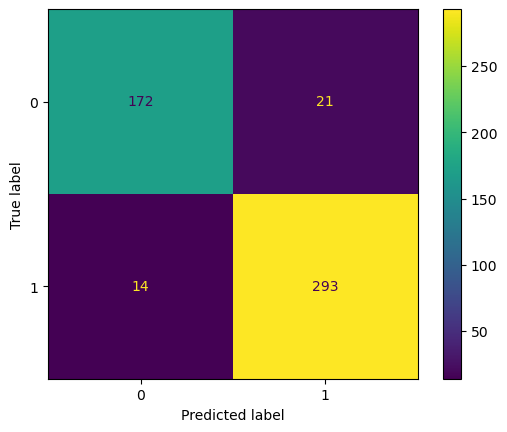

In [51]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

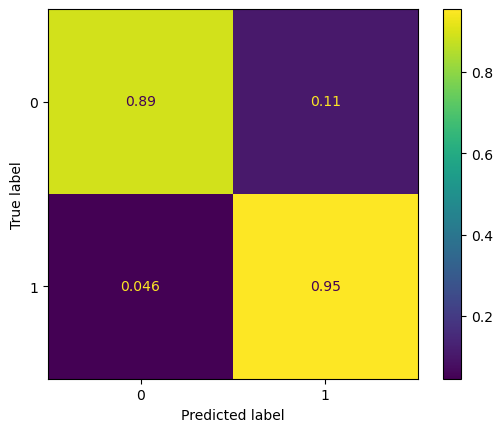

In [52]:
# Масштабированные данные: максимальное значение = 1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
precision_score(y_test, y_pred)

0.9331210191082803

In [56]:
recall_score(y_test, y_pred)

0.9543973941368078

In [57]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

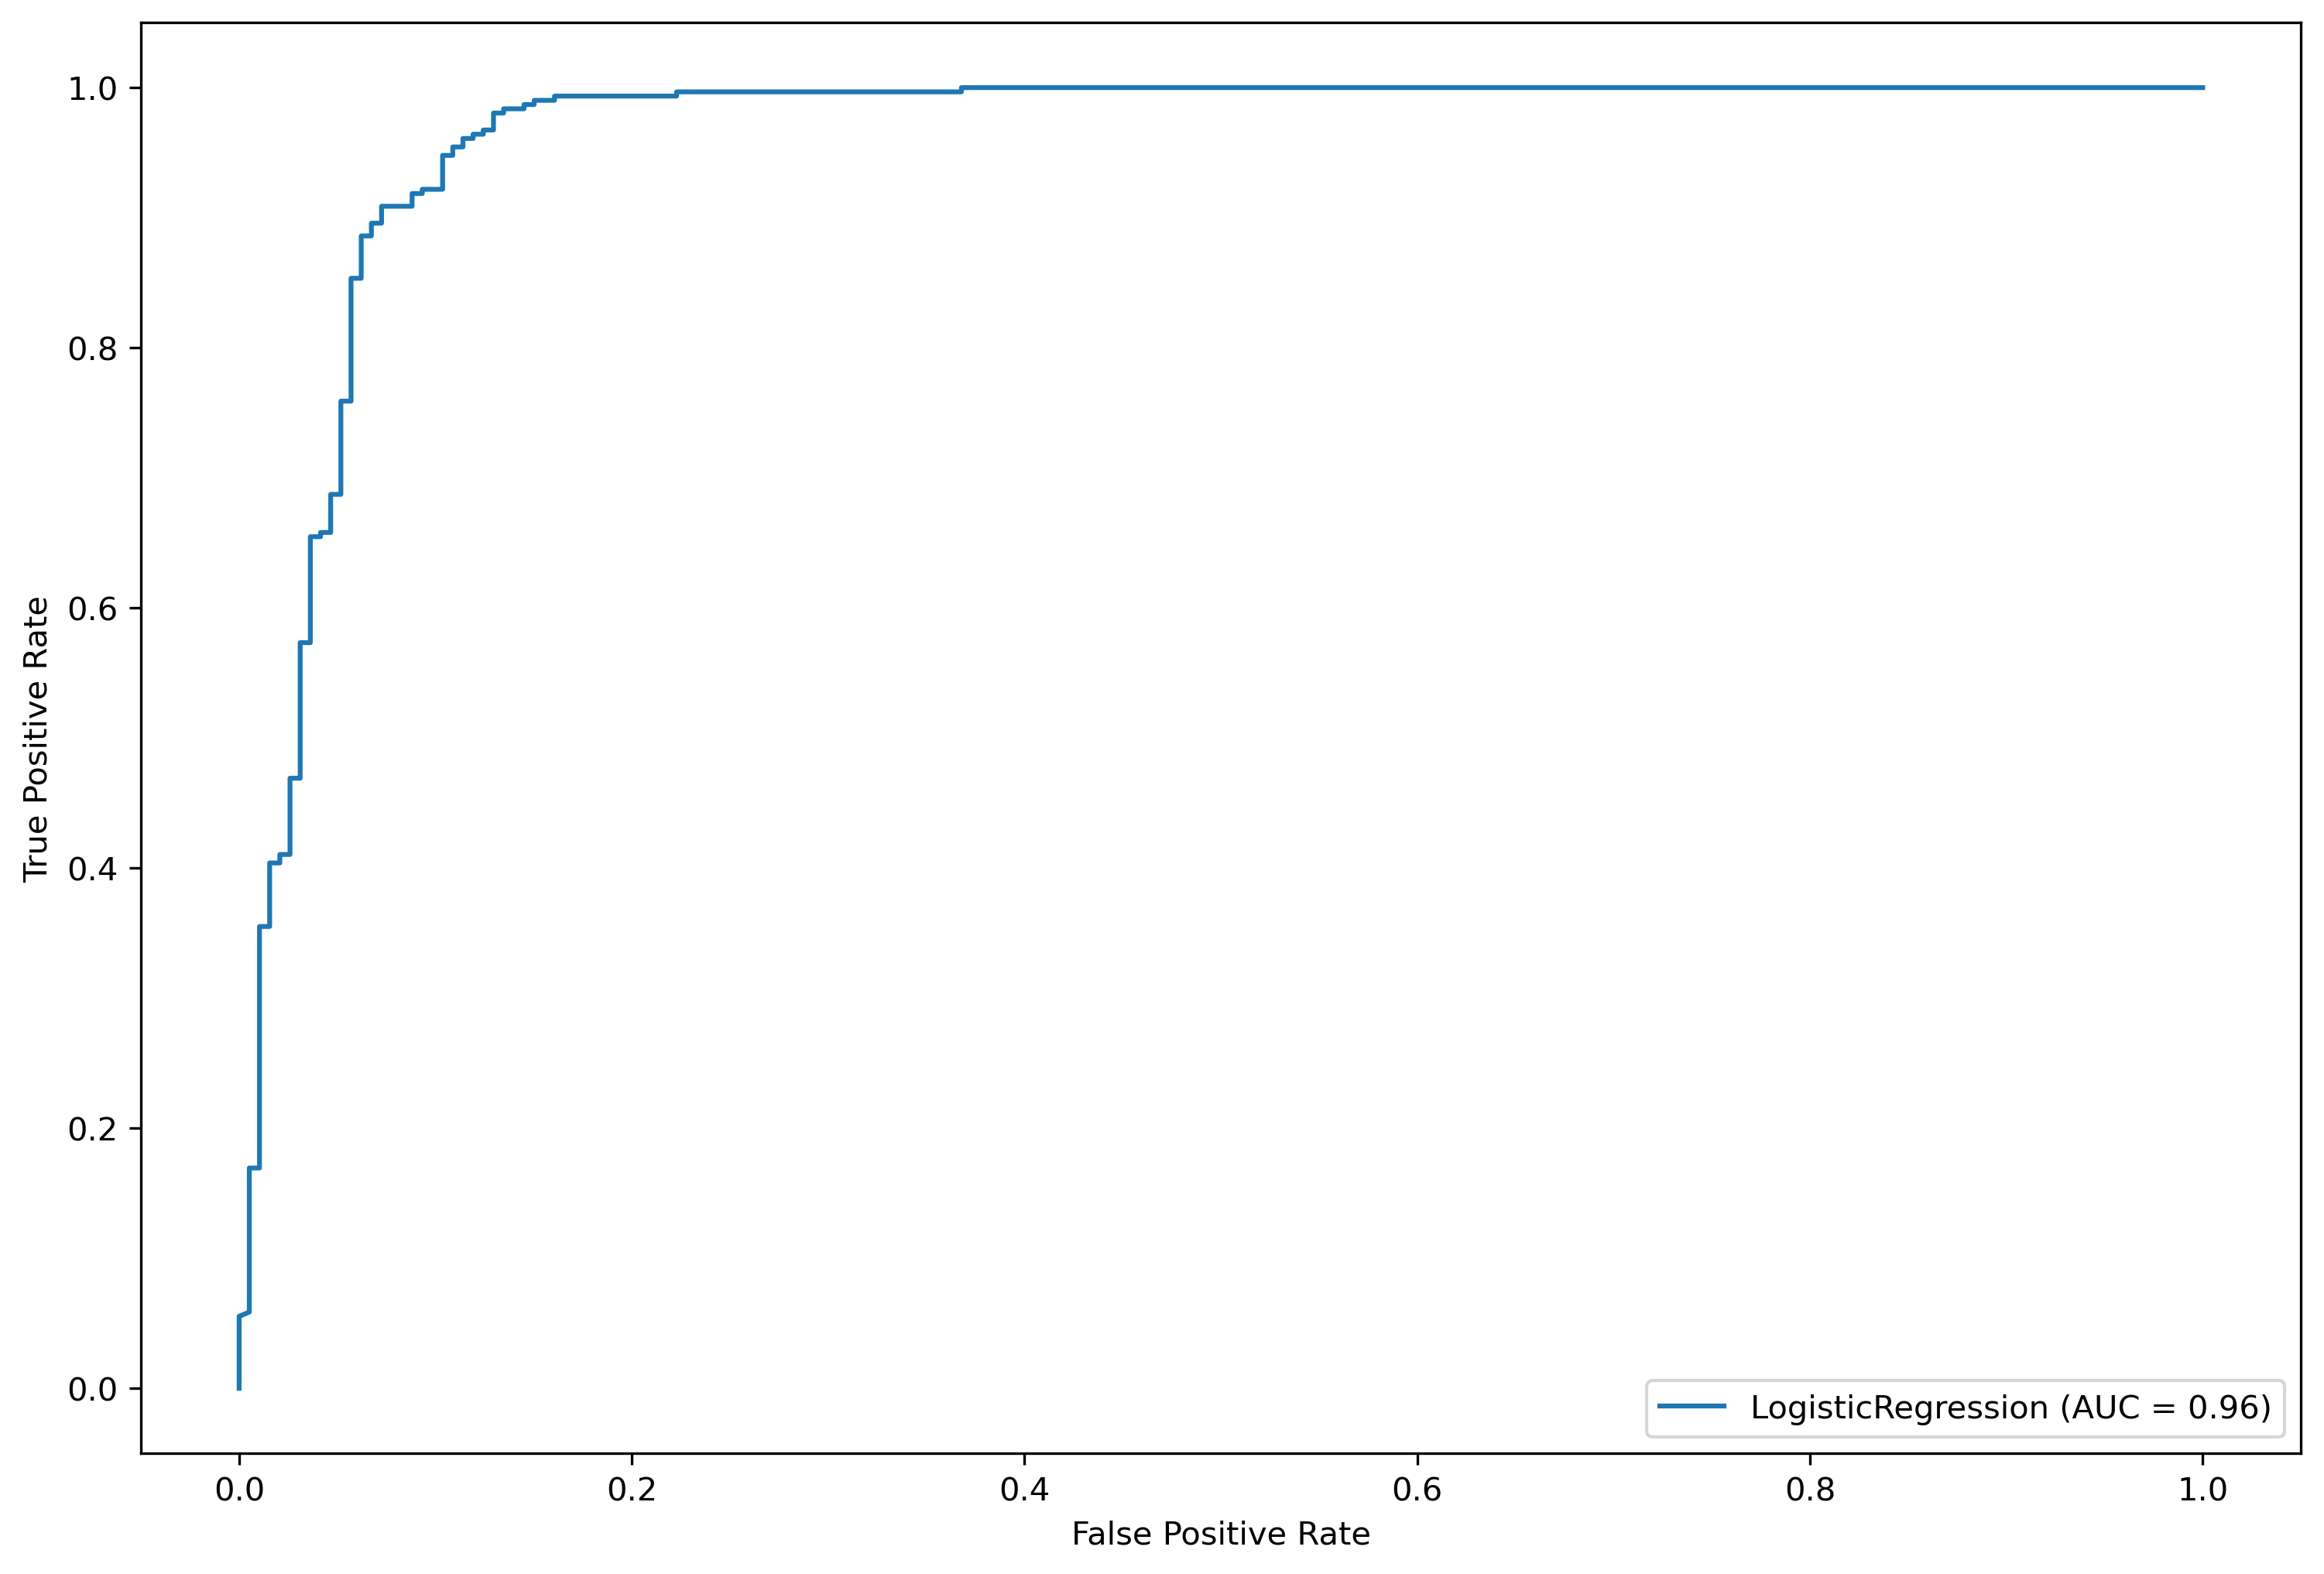

In [61]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
plot_roc_curve(log_model,scaled_X_test,y_test, ax=ax)

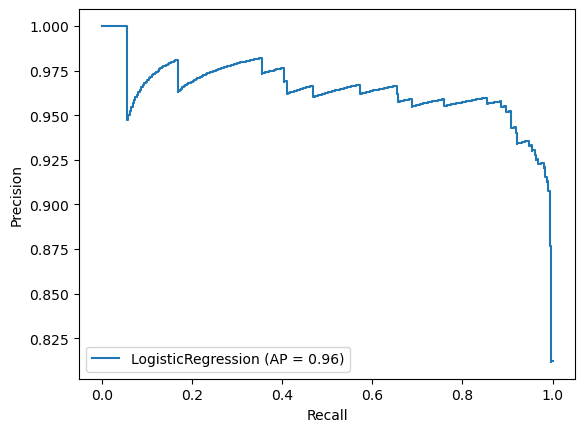

In [62]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)